In [1]:
# Exercise: 5-2
# Working with someone else, take turns picking a word that can be either a noun or a verb (e.g., contest); the
# opponent has to predict which one is likely to be the most frequent in the Brown Corpus. Check the opponent’s
# prediction, and tally the score over several turns.

import nltk

btw = nltk.corpus.brown.tagged_words()
cfd = nltk.ConditionalFreqDist(btw)
likely_nouns = ["conduct", "combat", "conflict", "contest", "contract",
                "impact", "insult", "object", "present", "progress", "project",
                "rebel", "refill", "refund", "subject"]

In [2]:
sum([cfd[ln].most_common()[0][0] == 'NN' for ln in likely_nouns])/len(likely_nouns)

0.8666666666666667

In [3]:
[(ln, cfd[ln].most_common()) for ln in likely_nouns if cfd[ln].most_common()[0][0] != 'NN']

[('present', [('JJ', 220), ('RB', 63), ('NN', 44), ('VB', 39), ('AP', 4)]),
 ('refill', [('VB', 1)])]

In [4]:
nltk.help.brown_tagset('JJ')

JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...


In [5]:
dual_meaning = ["conduct", "attribute", "combat", "conflict", "contest",
                "contract", "decrease", "escort", "impact", "increase",
                "insult", "object", "permit", "present", "proceed", "progress",
                "project", "rebel", "refill", "refund", "reject", "repeat",
                "subject", "suspect"]
likely_verbs = [dm for dm in dual_meaning if dm not in likely_nouns]
sum([cfd[lv].most_common()[0][0] == 'VB' for lv in likely_verbs])/len(likely_verbs)

0.6666666666666666

In [6]:
[(lv, cfd[lv].most_common()) for lv in likely_verbs if cfd[lv].most_common()[0][0] != 'VB']

[('attribute', [('NN', 4), ('VB', 2)]),
 ('escort', [('NN', 5), ('VB', 4)]),
 ('increase', [('NN', 112), ('VB', 81), ('VB-HL', 1)])]

In [7]:
# Exercise: 5-5
# Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter.
# Create a dictionary d, and add some entries. What happens whether you try to access a non-existent entry,
# e.g., d['xyz']?


d = {'123': 'easy as', 'DoReMi': 'simple as', 'abc': 'baby, you and me girl'}

In [8]:
d['xyz']

KeyError: 'xyz'

In [9]:
# Exercise: 5-6
# Try deleting an element from a dictionary d, using the syntax del d['abc']. Check that the item was deleted.

d['abc']

'baby, you and me girl'

In [10]:
del d['abc']

In [11]:
d['abc']

KeyError: 'abc'

In [12]:
# Exercise: 5-7
# Create two dictionaries, d1 and d2, and add some entries to each. Now issue the command d1.update(d2).
# What did this do? What might it be useful for?

d1 = {'do': 'a deer, a female deer', 're': 'a drop of golden sun'}
d2 = {'mi': 'a name I call myself', 'fa': 'a long, long way to run'}

In [13]:
d1.update(d2)
d1

{'do': 'a deer, a female deer',
 're': 'a drop of golden sun',
 'mi': 'a name I call myself',
 'fa': 'a long, long way to run'}

In [14]:
# Exercise: 5-8
# Create a dictionary e, to represent a single lexical entry for some word of your choice. Define keys such as
# headword, part-of-speech, sense, and example, and assign them suitable values.

e = {'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
  'part-of-speech': 'Noun',
  'sense': 'type of footwear',
  'example': 'Winklepickers were very popular among mods in the 60s.'}
e

{'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
 'part-of-speech': 'Noun',
 'sense': 'type of footwear',
 'example': 'Winklepickers were very popular among mods in the 60s.'}

In [15]:
# Exercise: 5-10
# Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

from nltk.corpus import brown

unigram_tagger = nltk.UnigramTagger(brown.tagged_sents())
test = "this shouldn't be too difficult"
unigram_tagger.tag(test.split())

[('this', 'DT'),
 ("shouldn't", 'MD*'),
 ('be', 'BE'),
 ('too', 'QL'),
 ('difficult', 'JJ')]

In [16]:
test2 = """
        this should be a bit more of a challenge,
        as they didn't have blogs when the corpus
        was compiled
        """
unigram_tagger.tag(test2.split())

[('this', 'DT'),
 ('should', 'MD'),
 ('be', 'BE'),
 ('a', 'AT'),
 ('bit', 'NN'),
 ('more', 'QL'),
 ('of', 'IN'),
 ('a', 'AT'),
 ('challenge,', None),
 ('as', 'CS'),
 ('they', 'PPSS'),
 ("didn't", 'DOD*'),
 ('have', 'HV'),
 ('blogs', None),
 ('when', 'WRB'),
 ('the', 'AT'),
 ('corpus', 'NN'),
 ('was', 'BEDZ'),
 ('compiled', 'VBN')]

In [17]:
# Exercise: 5-11
# Learn about the affix tagger (type help(nltk.AffixTagger)). Train an affix tagger and run it on some new text.
# Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

help(nltk.AffixTagger)

Help on class AffixTagger in module nltk.tag.sequential:

class AffixTagger(ContextTagger)
 |  AffixTagger(train=None, model=None, affix_length=-3, min_stem_length=2, backoff=None, cutoff=0, verbose=False)
 |  
 |  A tagger that chooses a token's tag based on a leading or trailing
 |  substring of its word string.  (It is important to note that these
 |  substrings are not necessarily "true" morphological affixes).  In
 |  particular, a fixed-length substring of the word is looked up in a
 |  table, and the corresponding tag is returned.  Affix taggers are
 |  typically constructed by training them on a tagged corpus.
 |  
 |  Construct a new affix tagger.
 |  
 |  :param affix_length: The length of the affixes that should be
 |      considered during training and tagging.  Use negative
 |      numbers for suffixes.
 |  :param min_stem_length: Any words whose length is less than
 |      min_stem_length+abs(affix_length) will be assigned a
 |      tag of None by this tagger.
 |  
 |  Me

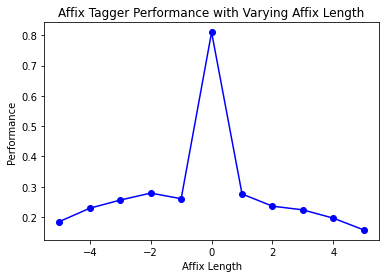

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')

def performance(affix_size):
    affix_tagger = nltk.AffixTagger(brown_tagged_sents, affix_length = affix_size)
    return affix_tagger.evaluate(brown_tagged_sents)

def display():
    sizes = np.arange(-5, 6)
    perfs = [performance(size) for size in sizes]
    plt.plot(sizes, perfs, '-bo')
    plt.title('Affix Tagger Performance with Varying Affix Length')
    plt.xlabel('Affix Length')
    plt.ylabel('Performance')
    plt.show()

display()

In [19]:
# Exercise: 5-12
# Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new
# data. What happens to the performance of the tagger? Why?

size = int(len(brown_tagged_sents) * 0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(train_sents)

0.7884137382485832

In [20]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

In [21]:
# Exercise: 5-13
# We can use a dictionary to specify the values to be substituted into a formatting string. Read Python’s library
# documentation for formatting strings (http://docs.python.org/lib/typesseq-strings.html) and use this method to
# display today’s date in two different formats.

date = {'month': '11', 'date': '06', 'day': 'Wednesday', 'year': '2019'}

print("European style: {}, {}.{}.{}".format(date['day'], date['date'],
                                            date['month'], date['year']))
print("American style: {}, {}/{}/{}".format(date['day'], date['month'],
                                            date['date'], date['year']))
print("Asian style: {}, {}.{}.{}".format(date['day'], date['year'],
                                         date['month'], date['date']))

European style: Wednesday, 06.11.2019
American style: Wednesday, 11/06/2019
Asian style: Wednesday, 2019.11.06


In [22]:
# Exercise: 5-14
# Use sorted() and set() to get a sorted list of tags used in the Brown Corpus, removing duplicates.

print(sorted(set([t for (_, t) in brown.tagged_words()])), end = '')

["'", "''", '(', '(-HL', ')', ')-HL', '*', '*-HL', '*-NC', '*-TL', ',', ',-HL', ',-NC', ',-TL', '--', '---HL', '.', '.-HL', '.-NC', '.-TL', ':', ':-HL', ':-TL', 'ABL', 'ABN', 'ABN-HL', 'ABN-NC', 'ABN-TL', 'ABX', 'AP', 'AP$', 'AP+AP-NC', 'AP-HL', 'AP-NC', 'AP-TL', 'AT', 'AT-HL', 'AT-NC', 'AT-TL', 'AT-TL-HL', 'BE', 'BE-HL', 'BE-TL', 'BED', 'BED*', 'BED-NC', 'BEDZ', 'BEDZ*', 'BEDZ-HL', 'BEDZ-NC', 'BEG', 'BEM', 'BEM*', 'BEM-NC', 'BEN', 'BEN-TL', 'BER', 'BER*', 'BER*-NC', 'BER-HL', 'BER-NC', 'BER-TL', 'BEZ', 'BEZ*', 'BEZ-HL', 'BEZ-NC', 'BEZ-TL', 'CC', 'CC-HL', 'CC-NC', 'CC-TL', 'CC-TL-HL', 'CD', 'CD$', 'CD-HL', 'CD-NC', 'CD-TL', 'CD-TL-HL', 'CS', 'CS-HL', 'CS-NC', 'CS-TL', 'DO', 'DO*', 'DO*-HL', 'DO+PPSS', 'DO-HL', 'DO-NC', 'DO-TL', 'DOD', 'DOD*', 'DOD*-TL', 'DOD-NC', 'DOZ', 'DOZ*', 'DOZ*-TL', 'DOZ-HL', 'DOZ-TL', 'DT', 'DT$', 'DT+BEZ', 'DT+BEZ-NC', 'DT+MD', 'DT-HL', 'DT-NC', 'DT-TL', 'DTI', 'DTI-HL', 'DTI-TL', 'DTS', 'DTS+BEZ', 'DTS-HL', 'DTX', 'EX', 'EX+BEZ', 'EX+HVD', 'EX+HVZ', 'EX+MD', '

In [23]:
# Exercise: 5-15
#  Write programs to process the Brown Corpus and find answers to the following questions:
# a: Which nouns are more common in their plural form, rather than their singular form? (Only consider regular
# plurals, formed with the -s suffix.)

sing_nouns = set(word.lower() for (word, tag) in \
                              nltk.corpus.brown.tagged_words() \
                              if tag == 'NN')

plur_nouns = set([word.lower() for (word, tag) in nltk.corpus.brown.tagged_words() if tag == 'NNS'])
cands = [n for n in sing_nouns if n + "s" in plur_nouns]
snfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() \
                   if word in sing_nouns)
pnfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() \
                   if word in plur_nouns)
more_common_plur = [(pnfd[c + 's'], c + 's', snfd[c], c) for c in cands \
                    if pnfd[c + 's'] > snfd[c]]
sorted(more_common_plur, reverse = True)[:20]

[(943, 'years', 649, 'year'),
 (391, 'eyes', 119, 'eye'),
 (361, 'things', 331, 'thing'),
 (312, 'members', 133, 'member'),
 (291, 'means', 199, 'mean'),
 (269, 'words', 261, 'word'),
 (204, 'students', 109, 'student'),
 (193, 'minutes', 54, 'minute'),
 (188, 'months', 130, 'month'),
 (179, 'conditions', 89, 'condition'),
 (173, 'hours', 145, 'hour'),
 (169, 'miles', 42, 'mile'),
 (160, 'terms', 79, 'term'),
 (150, 'friends', 125, 'friend'),
 (138, 'methods', 137, 'method'),
 (125, 'sales', 44, 'sale'),
 (115, 'arms', 91, 'arm'),
 (106, 'leaders', 69, 'leader'),
 (103, 'elements', 52, 'element'),
 (102, 'factors', 71, 'factor')]

In [24]:
# b: Which word has the greatest number of distinct tags? What are they, and what do they represent?

from collections import defaultdict

dt = nltk.ConditionalFreqDist(brown.tagged_words())
tags = defaultdict(list)
for w in set(brown.words()):
    tags[len(dt[w])].append(w)
max(tags)

12

In [25]:
tags[12]

['that']

In [26]:
print(tags[7], end = '')

['Chinese', 'home', 'Long', 'That', 'out', 'as', 'I', 'well', 'fit', 'it', 'for', 'Little']

In [27]:
dt['that']

FreqDist({'CS': 6419, 'DT': 1975, 'WPS': 1638, 'WPO': 135, 'QL': 54, 'DT-NC': 6, 'WPS-NC': 3, 'CS-NC': 2, 'WPS-HL': 2, 'CS-HL': 1, ...})

In [28]:
for tag in dt['that']:
    nltk.help.brown_tagset(tag)

CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
DT: determiner/pronoun, singular
    this each another that 'nother
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
WPO: WH-pronoun, accusative
    whom that who
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.


In [29]:
import re, copy
bts_copy = copy.deepcopy(brown.tagged_words())
bts_copy = [(word, re.sub(r'-HL$|-NC$|-TL$', '', tag)) for word, tag in bts_copy]
dt2 = nltk.ConditionalFreqDist(bts_copy)
tags2 = defaultdict(list)
for w in set(w.lower() for w in brown.words()):
    tags2[len(dt2[w])].append(w)

max(tags2)

6

In [30]:
tags2[6]

['beat', ':', 'still', 'that', 'well']

In [31]:
dt2['that']

FreqDist({'CS': 6422, 'DT': 1981, 'WPS': 1643, 'WPO': 136, 'QL': 54, 'NIL': 1})

In [32]:
for tag in dt2['that']:
    nltk.help.brown_tagset(tag)

CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
DT: determiner/pronoun, singular
    this each another that 'nother
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
WPO: WH-pronoun, accusative
    whom that who
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
No matching tags found.


In [33]:
# c: List tags in order of decreasing frequency. What do the 20 most frequent tags represent?

tags = [tags for _, tags in brown.tagged_words()]

ft = nltk.FreqDist(tags)

In [34]:
print(ft.most_common(100), end = '')

[('NN', 152470), ('IN', 120557), ('AT', 97959), ('JJ', 64028), ('.', 60638), (',', 58156), ('NNS', 55110), ('CC', 37718), ('RB', 36464), ('NP', 34476), ('VB', 33693), ('VBN', 29186), ('VBD', 26167), ('CS', 22143), ('PPS', 18253), ('VBG', 17893), ('PP$', 16872), ('TO', 14918), ('PPSS', 13802), ('CD', 13510), ('NN-TL', 13372), ('MD', 12431), ('PPO', 11181), ('BEZ', 10066), ('BEDZ', 9806), ('AP', 9522), ('DT', 8957), ('``', 8837), ("''", 8789), ('QL', 8735), ('VBZ', 7373), ('BE', 6360), ('RP', 6009), ('WDT', 5539), ('HVD', 4895), ('*', 4603), ('WRB', 4509), ('BER', 4379), ('JJ-TL', 4107), ('NP-TL', 4019), ('HV', 3928), ('WPS', 3924), ('--', 3405), ('BED', 3282), ('ABN', 3010), ('DTI', 2921), ('PN', 2573), ('NP$', 2565), ('BEN', 2470), ('DTS', 2435), ('HVZ', 2433), (')', 2273), ('(', 2264), ('NNS-TL', 2226), ('EX', 2164), ('JJR', 1958), ('OD', 1935), ('NR', 1566), (':', 1558), ('NN$', 1480), ('IN-TL', 1477), ('NN-HL', 1471), ('DO', 1353), ('NPS', 1275), ('PPL', 1233), ('RBR', 1182), ('DOD'

In [35]:
for tag, _ in ft.most_common(20):
    nltk.help.brown_tagset(tag)

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
.: sentence terminator
    . ? ; ! :
,: comma
    ,
NNS: noun, plural, common
    irregularities presentments thanks reports voters laws legislators
    years areas adjustments chambers $100 bonds courts sales details raises
    sessions members congressmen votes polls calls ...
CC

In [36]:
# d: Which tags are nouns most commonly found after? What do these tags represent?

wtp = nltk.bigrams(brown.tagged_words())
np = [a[1] for (a, b) in wtp if b[1].startswith('NN')]
fd = nltk.FreqDist(np)
prec_tags = [tag for (tag, _) in fd.most_common(20)]
print(prec_tags, end = '')

['AT', 'JJ', 'IN', 'NN', 'PP$', 'CC', 'CD', 'AP', 'DT', 'VBG', ',', 'VBN', '.', 'NN-TL', 'JJ-TL', 'VB', 'NP', 'NP-TL', 'CS', 'NP$']

In [37]:
for tag in prec_tags:
    nltk.help.brown_tagset(tag)

AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
PP$: determiner, possessive
    our its his their my your her out thy mine thine
CC: conjunction, coordinating
    and or but plus & either neither nor yet 'n' and/or minus an'
CD: numeral, cardinal
    two one 1 four 2 1913 71 74 637 1937 8 five three million 87-31 29-5
    seven 

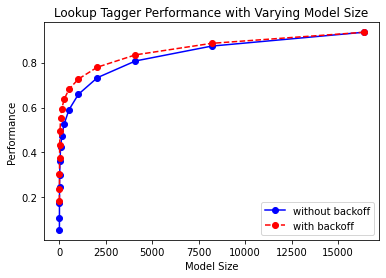

In [38]:
# Exercise: 5-16
# Explore the following issues that arise in connection with the lookup tagger:
# a: What happens to the tagger performance for the various model sizes when a backoff tagger is omitted?
# b: Consider the curve in Figure 5-4; suggest a good size for a lookup tagger that balances memory and
# performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize
# performance with no regard for memory usage?

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import brown

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt)
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

def performance_w_bo(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt,
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    perfs_bo = [performance_w_bo(cfd, words_by_freq[:size]) for size in sizes]
    plt.plot(sizes, perfs, '-bo', label = 'without backoff')
    plt.plot(sizes, perfs_bo, '--ro', label = 'with backoff')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.legend(loc = 'lower right')
    plt.show()

display()

In [39]:
# Exercise: 5-17
# What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint:
# write a program to work out what percentage of tokens of a word are assigned the most likely tag for that
# word, on average.)

cfd = nltk.ConditionalFreqDist(brown.tagged_words())

sum([tag.startswith(cfd[word].max()) for word, tag in \
     brown.tagged_words()]) / len(brown.tagged_words())

0.9360054151251472

In [40]:
wsj = nltk.corpus.treebank.tagged_words()
cfd = nltk.ConditionalFreqDist(wsj)
sum([tag == cfd[word].max() for word, tag in wsj]) / len(wsj)

0.9599705987524335

In [41]:
# Exercise: 5-18
# Generate some statistics for tagged data to answer the following questions:
# a: What proportion of word types are always assigned the same part-of-speech tag?

import re, copy
bts_copy = copy.deepcopy(brown.tagged_words())
bts_copy = [(word, re.sub(r'-HL$|-NC$|-TL$', '', tag)) for word, tag in bts_copy]

cfd = nltk.ConditionalFreqDist(bts_copy)

tags = defaultdict(list)
for w in set(w.lower() for w, _ in bts_copy):
    tags[len(cfd[w])].append(w)

one_tag = len(tags[1]); one_tag

33948

In [42]:
word_types = len(set(w.lower() for w, _ in bts_copy)); word_types

49815

In [43]:
one_tag / word_types

0.6814814814814815

In [44]:
# b: How many words are ambiguous, in the sense that they appear with at least two tags?

word_types - one_tag

15867

In [45]:
# c: What percentage of word tokens in the Brown Corpus involve these ambiguous words?

ambiguous = {}
for w in set(w.lower() for w, _ in bts_copy):
    if len(cfd[w]) >= 2:
        ambiguous[w] = ''

sum([w.lower() in ambiguous for w in brown.words()]) / len(brown.words())

0.5946579032580314

In [46]:
# Exercise: 5-20
# Write code to search the Brown Corpus for particular words and phrases according to tags, to answer
# the following questions:
# a: Produce an alphabetically sorted list of the distinct words tagged as MD.

print(sorted(set([w.lower() for w, t in brown.tagged_words() if t == 'MD'])),
      end = '')

["c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought', 'shall', 'should', 'shuld', 'shulde', 'wil', 'will', 'wilt', 'wod', 'wold', 'wolde', 'would']

In [47]:
# b: Identify words that can be plural nouns or third person singular verbs (e.g., deals, flies).

cfd = nltk.ConditionalFreqDist(brown.tagged_words())
NNS_VBZ = set([w for w in set(w.lower() for w, t in brown.tagged_words()) \
               if 'NNS' in cfd[w] and 'VBZ' in cfd[w]])
print(NNS_VBZ, end = '')

{'solos', 'ranks', 'courts', 'flares', 'stresses', 'factors', 'flows', 'winds', 'records', 'registers', 'features', 'loves', 'stops', 'fears', 'casts', 'watches', 'functions', 'hints', 'presses', 'mistakes', 'amounts', 'skirts', 'fashions', 'gestures', 'tortures', 'arches', 'dances', 'bases', 'votes', 'quarrels', 'rallies', 'boards', 'exercises', 'lives', 'keeps', 'sheds', 'initiates', 'centers', 'causes', 'starts', 'shifts', 'offers', 'doubles', 'shapes', 'remains', 'totals', 'bargains', 'sets', 'swoops', 'cuts', 'lines', 'rings', 'senses', 'means', 'hinges', 'clucks', 'springs', 'attributes', 'jumps', 'belts', 'wants', 'holds', 'sanctions', 'blueprints', 'decreases', 'signals', 'looks', 'makes', 'lands', 'clouds', 'captures', 'touches', 'designs', 'covers', 'bellows', 'bulletins', 'supports', 'replies', 'regards', 'practices', 'tastes', 'forms', 'spans', 'estimates', 'acts', 'ranches', 'rushes', 'dies', 'parades', 'snowballs', 'trades', 'figures', 'mirrors', 'deals', 'promises', 'plo

In [48]:
# c: Identify three-word prepositional phrases of the form IN + DET + NN (e.g., in the lab).

three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents()\
                 for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent)\
                 if t1.startswith('IN') and \
                 (t2.startswith('DT') or t2 == 'AT') and t3.startswith('NN')]
print(three_word_pp[:50], end = '')

[('of', 'the', 'election'), ('of', 'the', 'City'), ('for', 'the', 'manner'), ('in', 'the', 'election'), ('of', 'this', 'city'), ('to', 'the', 'end'), ('on', 'a', 'number'), ('of', 'the', 'law'), ('at', 'the', 'State'), ('through', 'the', 'welfare'), ('in', 'the', 'state'), ('with', 'the', 'exception'), ('of', 'this', 'money'), ('of', 'these', 'funds'), ('in', 'the', 'future'), ('in', 'the', 'appointment'), ('in', 'a', 'manner'), ('of', 'the', 'concessionaires'), ('for', 'the', 'purpose'), ('at', 'the', 'jail'), ('for', 'the', 'mayor'), ('than', 'a', 'year'), ('on', 'the', 'petition'), ('from', 'the', 'audience'), ('for', 'a', 'state'), ('of', 'the', 'voters'), ('in', 'each', 'county'), ('under', 'the', 'county'), ('for', 'some', 'time'), ('of', 'the', 'highway'), ('of', 'the', 'number'), ('in', 'the', 'session'), ('to', 'the', 'state'), ('of', 'the', 'act'), ('with', 'a', 'battle'), ('in', 'the', 'Legislature'), ('against', 'the', 'issuance'), ('about', 'the', 'plans'), ('in', 'the', '

In [49]:
three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents(tagset = 'universal')\
                 for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent)\
                 if t1 == 'ADP' and t2 == 'DET' and t3 == 'NOUN']
print(three_word_pp[:10], end = '')

[('that', 'any', 'irregularities'), ('that', 'the', 'City'), ('of', 'the', 'election'), ('of', 'the', 'City'), ('for', 'the', 'manner'), ('in', 'the', 'election'), ('of', 'this', 'city'), ('to', 'the', 'end'), ('on', 'a', 'number'), ('of', 'both', 'governments')]

In [50]:
[set(w.lower() for w,t in brown.tagged_words() if t.startswith('PP'))]

[{"'em",
  "'emselves",
  "'im",
  "'tain't",
  "'tis",
  'ah',
  'ahm',
  'dey',
  'em',
  "h'all",
  'he',
  "he'd",
  "he'll",
  "he's",
  'her',
  'hers',
  'herself',
  'him',
  'himself',
  'himselfe',
  'hir',
  'his',
  'hisself',
  'hym',
  'hymselfe',
  'hys',
  'hytt',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  'mah',
  'me',
  'mee',
  'mine',
  'my',
  'myn',
  'myne',
  'myself',
  'oneself',
  'our',
  'ours',
  'ourselves',
  'out',
  'ownself',
  'she',
  "she'd",
  "she'll",
  "she's",
  'thay',
  'thee',
  'thei',
  'their',
  "their's",
  'theirs',
  'them',
  'themselves',
  'ther',
  'they',
  "they'd",
  "they'll",
  "they're",
  "they've",
  'thine',
  'thou',
  'thum',
  'thy',
  'u',
  'um',
  'us',
  'we',
  "we'd",
  "we'll",
  "we're",
  "we'uns",
  "we've",
  'wee',
  "y'all",
  "y'know",
  "y'r",
  "y're",
  'ya',
  'ye',
  "ye're",
  'yore',
  'you',
  "you'd",
  "you'll",
  "you're",
  "you

In [51]:
m = ["he'd",  "he'll",  "he's",  "'im",  'he',  'him',  'himself',  'himselfe',  'his',  'hisself',  'hym',  'hymselfe',  'hys']
f = ["she'd",  "she'll",  "she's",  'her',  'hers',  'herself',  'hir',  'she']
cfd["she'd"]

FreqDist({'PPS+MD': 28, 'PPS+HVD': 27})

In [52]:
sum(cfd["she'd"].values())

55

In [53]:
m_values = sum([sum(cfd[mp].values()) for mp in m])
f_values = sum([sum(cfd[fp].values()) for fp in f])
m_values/f_values

3.2378880759343485

In [54]:
# Exercise: 5-21
# In Table 3-1, we saw a table involving frequency counts for the verbs adore, love, like, and prefer,
# and preceding qualifiers such as really. Investigate the full range of qualifiers (Brown tag QL) that
# appear before these four verbs.

wtp = nltk.bigrams(brown.tagged_words())
vp = sorted(set([a[0] for (a, b) in wtp if a[1].startswith('RB') and b[0] in\
     ('adore', 'love', 'like', 'prefer')]))
print(vp, end = '')

['Jist', 'Just', 'Kinda', 'More', 'abreast', 'almost', 'alone', 'always', 'around', 'by', 'close', 'dearly', 'deceptively', 'even', 'exactly', 'generally', 'gloriously', 'here', 'increasingly', 'jist', 'just', 'less', 'more', 'much', 'often', 'particularly', 'quick', 'rather', 'remarkably', 'roughly', 'simply', 'so', 'somewhat', 'spontaneously', 'sure', 'there', 'together', 'wildly', 'yet']

In [55]:
# Exercise: 5-22
# We defined the regexp_tagger that can be used as a fall-back tagger for unknown words. This tagger only checks
# for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other
# tags. For example, we could tag any word that ends with -s as a plural noun. Define a regular expression tagger
# (using RegexpTagger()) that tests for at least five other patterns in the spelling of words. (Use inline
# documentation to explain the rules.)

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs

    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown.sents(categories = 'news')[3]), end = '')

[('``', '.'), ('Only', 'ADV'), ('a', 'DET'), ('relative', 'JJ'), ('handful', 'JJ'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", '.'), (',', '.'), ('the', 'DET'), ('jury', 'JJ'), ('said', 'NN'), (',', '.'), ('``', '.'), ('considering', 'VBG'), ('the', 'DET'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'DET'), ('election', 'NN'), (',', '.'), ('the', 'DET'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'DET'), ('size', 'VB'), ('of', 'NN'), ('this', 'NNS'), ('city', 'JJ'), ("''", '.'), ('.', '.')]

In [56]:
regexp_tagger.evaluate(brown.tagged_sents(categories = 'news'))

0.23470970821648068

In [57]:
# Exercise: 5-24
# How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6.
# Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of
# 105 and a tagset size of 102.

train_size = np.arange(0.1, 1, 0.1)
perfs_uni = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    unigram_tagger = nltk.UnigramTagger(train_sents)
    perfs_uni.append(unigram_tagger.evaluate(test_sents))

In [58]:
perfs_bi = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    bigram_tagger = nltk.BigramTagger(train_sents)
    perfs_bi.append(bigram_tagger.evaluate(test_sents))

In [59]:
perfs_tri = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    trigram_tagger = nltk.TrigramTagger(train_sents)
    perfs_tri.append(trigram_tagger.evaluate(test_sents))

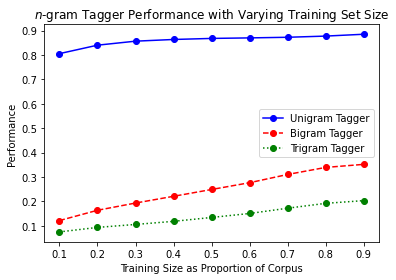

In [60]:
plt.plot(train_size, perfs_uni, '-bo', label = 'Unigram Tagger')
plt.plot(train_size, perfs_bi, '--ro', label = 'Bigram Tagger')
plt.plot(train_size, perfs_tri, ':go', label = 'Trigram Tagger')
plt.title('$n$-gram Tagger Performance with Varying Training Set Size')
plt.xlabel('Training Size as Proportion of Corpus')
plt.ylabel('Performance')
plt.legend(loc = 'best')
plt.show()

In [61]:
len(set(brown.words()))

56057

In [62]:
sum([len(s) for s in train_sents])

1065750

In [63]:
size = int(len(brown.tagged_sents()) * 0.9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8849353534083527

In [64]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.3515747783994468

In [65]:
trigram_tagger = nltk.TrigramTagger(train_sents)
trigram_tagger.evaluate(test_sents)

0.2029714381509189

In [66]:
four_gram_tagger = nltk.tag.sequential.NgramTagger(4, train_sents)
four_gram_tagger.evaluate(test_sents)

0.15251147293644307

In [67]:
five_gram_tagger = nltk.tag.sequential.NgramTagger(5, train_sents)
five_gram_tagger.evaluate(test_sents)

0.1402003310911339

In [68]:
six_gram_tagger = nltk.tag.sequential.NgramTagger(6, train_sents)
six_gram_tagger.evaluate(test_sents)

0.1383667567737474

In [69]:
# Exercise: 5-25
# Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the
# language is morphologically complex, or if there are any orthographic clues (e.g., capitalization) to word
# classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before
# the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data?
# Discuss any issues you encounter in applying these methods to the language.

from nltk.corpus import jeita
print(jeita.tagged_sents()[0], end = '')

[('\u3000', '\u3000\t\u3000\t記号-空白'), ('新潟', 'ニイガタ\t新潟\t名詞-固有名詞-地域-一般'), ('の', 'ノ\tの\t助詞-連体化'), ('停車場', 'テイシャジョウ\t停車場\t名詞-一般'), ('を', 'ヲ\tを\t助詞-格助詞-一般'), ('出る', 'デル\t出る\t動詞-自立\t一段\t基本形'), ('と', 'ト\tと\t助詞-接続助詞'), ('列車', 'レッシャ\t列車\t名詞-一般'), ('の', 'ノ\tの\t助詞-連体化'), ('箱', 'ハコ\t箱\t名詞-一般'), ('から', 'カラ\tから\t助詞-格助詞-一般'), ('まけ', 'マケ\tまける\t動詞-自立\t一段\t連用形'), ('出さ', 'ダサ\t出す\t動詞-自立\t五段・サ行\t未然形'), ('れ', 'レ\tれる\t動詞-接尾\t一段\t連用形'), ('た', 'タ\tた\t助動詞\t特殊・タ\t基本形'), ('樣', '\t\t未知語'), ('に', 'ニ\tに\t助詞-格助詞-一般'), ('人々', 'ヒトビト\t人々\t名詞-一般'), ('は', 'ハ\tは\t助詞-係助詞'), ('ぞ', 'ゾ\tぞ\t助詞-係助詞'), ('ろ', 'ロ\tろ\t名詞-一般'), ('／', '／\t／\t記号-一般'), ('＼', '＼\t＼\t記号-一般'), ('と', 'ト\tと\t助詞-格助詞-引用'), ('一方', 'イッポウ\t一方\t名詞-非自立-副詞可能'), ('へ', 'ヘ\tへ\t助詞-格助詞-一般'), ('向い', 'ムイ\t向く\t動詞-自立\t五段・カ行イ音便\t連用タ接続'), ('て', 'テ\tて\t助詞-接続助詞'), ('行く', 'イク\t行く\t動詞-非自立\t五段・カ行促音便\t基本形'), ('。', '。\t。\t記号-句点'), ('其', '\t\t未知語'), ('あと', 'アト\tあと\t名詞-一般'), ('へ', 'ヘ\tへ\t助詞-格助詞-一般'), ('跟', '\t\t未知語'), ('い', 'イ\tいる\t動詞-自立\t一段\t連用形'), ('て', 'テ\tて\t助詞-接続助詞'), ('行く', 'イク\

In [70]:
size = int(len(jeita.tagged_sents()) * 0.9)
train_sents = jeita.tagged_sents()[:size]
test_sents = jeita.tagged_sents()[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8649382697751626

In [71]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.06625315567675989

In [72]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -1)
affix_tagger.evaluate(jeita.tagged_sents())

0.020517766874928366

In [73]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -2)
affix_tagger.evaluate(jeita.tagged_sents())

0.018020838870710074

In [74]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -3)
affix_tagger.evaluate(jeita.tagged_sents())

0.006691250826957604

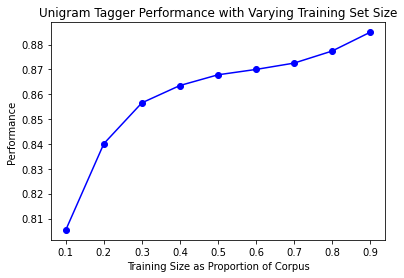

In [75]:
# Exercise: 5-26
# Example 5-4 plotted a curve showing change in the performance of a lookup tagger as the model size was
# increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

train_size = np.arange(0.1, 1, 0.1)
perfs_uni = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    unigram_tagger = nltk.UnigramTagger(train_sents)
    perfs_uni.append(unigram_tagger.evaluate(test_sents))


plt.plot(train_size, perfs_uni, '-bo')
plt.title('Unigram Tagger Performance with Varying Training Set Size')
plt.xlabel('Training Size as Proportion of Corpus')
plt.ylabel('Performance')
plt.show()

In [76]:
# Exercise: 5-27
# Inspect the confusion matrix for the bigram tagger t2 defined in N-Gram Tagging, and identify one or more sets of
# tags to collapse. Define a dictionary to do the mapping, and evaluate the tagger on the simplified data.

size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]


t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9125751765470128

In [77]:
test_tags = [tag for sent in brown.sents()[size:size + 10]
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents()[size:size + 10] for (word, tag) in sent]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

     |                    B                                                     P                            |
     |                    E  B  B                    J        N     P  P  P  P  P              V  V  V  V    |
     |  '        A  A  B  D  E  E  C  C  C  D  I  J  J  M  N  N  N  P  P  P  P  S  Q  R  T  V  B  B  B  B  ` |
     |  '  ,  .  P  T  E  Z  R  Z  C  D  S  T  N  J  R  D  N  S  P  $  L  O  S  S  L  B  O  B  D  G  N  Z  ` |
-----+-------------------------------------------------------------------------------------------------------+
  '' | <3> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
   , |  . <8> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
   . |  .  .<11> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
  AP |  .  .  . <1> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
 

In [78]:
def confusion_ct(mat, tag1, tag2):
    return mat._confusion[mat._indices[tag1]][mat._indices[tag2]]

def top_cm_errors(mat):
    conf = {}
    num_tags = len(mat._confusion)

    for tag1 in mat._indices:
        for tag2 in mat._indices:
            conf[(tag1, tag2)] = confusion_ct(mat, tag1, tag2)

    s_il = [((tag1, tag2), ct) for ((tag1, tag2), ct) in
            sorted(conf.items(), key = lambda x:x[1], reverse = True)
            if tag1 != tag2]

    return s_il

test_tags = [tag for sent in brown.sents()[size:]
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents()[size:] for (word, tag) in sent]
cm = nltk.ConfusionMatrix(gold_tags, test_tags)

print(top_cm_errors(cm)[:50], end = '')

[(('NP', 'NN'), 978), (('IN', 'TO'), 477), (('JJ', 'NN'), 442), (('VBD', 'VBN'), 354), (('VB', 'NN'), 314), (('NNS', 'NN'), 299), (('TO', 'IN'), 281), (('VBN', 'VBD'), 260), (('RP', 'IN'), 225), (('VBG', 'NN'), 188), (('DT', 'CS'), 175), (('NP$', 'NN'), 171), (('PPO', 'PP$'), 141), (('IN', 'RP'), 134), (('NN', 'JJ'), 130), (('CS', 'IN'), 109), (('RB', 'QL'), 105), (('PN', 'CD'), 101), (('RB', 'IN'), 97), (('PP$', 'PPO'), 96), (('RB', 'NN'), 96), (('NN', 'VB'), 95), (('VBN', 'NN'), 94), (('NN-TL', 'NN'), 92), (('QL', 'CS'), 88), (('VBD', 'NN'), 84), (('RB', 'JJ'), 81), (('WPS', 'CS'), 77), (('AP', 'JJ'), 71), (('NP-TL', 'NN'), 65), (('JJ', 'RB'), 64), (('IN', 'CS'), 62), (('PPO', 'PPSS'), 58), (('QL', 'RB'), 57), (('NP', 'NP-TL'), 56), (('IN', 'RB'), 51), (('AP', 'QL'), 50), (('RB', 'AP'), 49), (('UH', 'NN'), 48), (('NPS', 'NN'), 46), (('NN', 'VBG'), 45), (('NP-TL', 'NP'), 45), (('PPS', 'PPO'), 44), (('NNS', 'VBZ'), 42), (('FW-NN', 'NN'), 41), (('CS', 'RB'), 38), (('QL', 'ABN'), 38), ((

In [79]:
perf = []

# number of top_cm_errors to collapse
trials = [140, 100, 80, 60, 50, 40, 30, 20, 10, 5]

size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

for trial in trials:

    # create a new mapping of tags to be collapsed for each trial
    new_mappings = {}

    # if the first tag (what the tag should have been) is more common
    # than the second (how the word was mistakenly labeled),
    # collapse the second
    for tags, errors in top_cm_errors(cm)[:trial]:
        if ft[tags[0]] > ft[tags[1]]:
            new_mappings[tags[1]] = tags[0]

    # training and test sets have to be re-initialized for each trial

    new_train_sents = [[(word[0], new_mappings.get(word[1], word[1]))] for sent in train_sents for word in sent ]
    new_test_sents = [[(word[0], new_mappings.get(word[1], word[1]))] for sent in test_sents for word in sent ]
    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(new_train_sents, backoff = t0)
    t2 = nltk.BigramTagger(new_train_sents, backoff = t1)
    perf.append(t2.evaluate(new_test_sents))

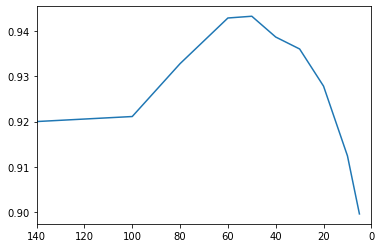

In [80]:
plt.plot(trials, perf)
plt.xlim(140, 0)
plt.show()

In [81]:
perf

[0.92000377192431,
 0.9211143940822698,
 0.9327864043083758,
 0.9428658242702375,
 0.9432534942687706,
 0.9386643196915404,
 0.9360239726745039,
 0.9278200373001404,
 0.9124284906016219,
 0.8996144255149724]

In [82]:
# Exercise: 5-28
# Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first
# character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to
# base its work. Discuss your findings.

from nltk.corpus import brown


size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents(tagset = 'universal')[:size]
test_sents = brown.tagged_sents(tagset = 'universal')[size:]


t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9245510362314285

In [83]:
1 - (1 - 0.9245510362314285) / (1 - 0.9125751765470128)

0.13698465963566697

In [84]:
from nltk.data import load

tagdict = load('help/tagsets/brown_tagset.pickle')
brown_tags = [item for item in tagdict.keys()]
print(brown_tags, end = "")

['DOZ*', 'FW-AT+NP', 'NP$', 'AP$', 'VBN', 'VBD', 'VBG', 'DO+PPSS', 'WRB+BEZ', 'VBZ', 'WQL', 'WRB+IN', 'WRB+BER', 'DT', 'FW-AT+NN', 'WP$', 'DO', 'FW-UH', 'PPSS+HVD', 'RB$', 'VB', ')', 'VB+AT', 'FW-JJT', 'FW-JJR', 'AP+AP', 'VBG+TO', 'RBR', 'BER', 'WPO', 'FW-VBZ', 'PN$', 'VBN+TO', 'FW-VBG', 'TO', 'FW-VBD', 'FW-RB', 'VB+IN', 'FW-VBN', 'DOD*', 'CS', 'NN+IN', 'RB', 'FW-NR', 'HV+TO', 'FW-NP', 'WRB+DOD*', 'FW-RB+CC', 'DTS+BEZ', 'CC', 'CD', 'NPS', 'RBR+CS', 'PN+BEZ', 'FW-*', 'NP+MD', 'MD+HV', 'RB+BEZ', 'NR$', 'NR', 'NP', 'PPSS+VB', 'FW-IN+AT', 'FW-VB', 'WPS+BEZ', 'NN', 'CD$', 'MD*', 'WRB+DO', 'WDT+HVZ', 'PPSS', 'FW-CC', 'HV*', 'FW-BER', '(', ',', 'NN+NN', 'FW-TO+VB', 'FW-PPL+VBZ', 'NP+BEZ', 'BEDZ', 'HVZ', 'ABX', 'FW-DTS', 'VB+VB', 'PN+MD', 'BED*', 'JJT', 'FW-PPO+IN', 'HVN', 'ABN', 'JJR', 'JJS', 'MD', 'NN+BEZ', 'HVG', 'HVD', 'WDT+DOD', 'FW-QL', 'EX+HVZ', 'WPS+HVD', 'PPS+MD', 'FW-PN', 'BEM*', 'EX+MD', 'BEDZ*', 'WPS+HVZ', 'FW-WPO', 'EX+HVD', 'NN+MD', 'FW-WPS', 'WRB+MD', 'EX+BEZ', 'PPSS+HV', 'FW-IN

In [85]:
simplified_mappings = {}

for tag in brown_tags:
    simplified_mappings[tag] = tag[0]

new_train_sents = [[(word[0], simplified_mappings.get(word[1], word[1]))] for sent in train_sents for word in sent ]
new_test_sents = [[(word[0], simplified_mappings.get(word[1], word[1]))] for sent in test_sents for word in sent ]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(new_train_sents, backoff = t0)
t2 = nltk.BigramTagger(new_train_sents, backoff = t1)
t2.evaluate(new_test_sents)

0.9156346262651662

In [86]:
1 - (1 - 0.9156346262651662) / (1 - 0.9125751765470128)

0.034995206136145485

In [87]:
# Exercise: 5-29
# Recall the example of a bigram tagger which encountered a word it hadn’t seen during training, and tagged the
# rest of the sentence as None. It is possible for a bigram tagger to fail partway through a sentence even if it
# contains no unseen words (even if the sentence was used during training). In what circumstance can this happen?
# Can you write a program to find some examples of this?

train_sents = brown.tagged_sents()

t0 = nltk.BigramTagger(train_sents)

import random

def find_None(sents, tagger, i = 0, n = 3):
    """
    Prints out sentence if two consecutive words are tagged
    with None.  Will run until $n$ sentences are found.

    Arguments:

    sents:  An untagged corpus.
    tagger: A trained bigram tagger.
    i:      The number of sentences already printed.
    n:      The target number of sentences to be printed.
            Default is 3.
    """
    r = random.randint(0, len(sents))
    test_tag = tagger.tag(sents[r])
    for j in range(len(test_tag) - 1):
        if test_tag[j][1] is None and test_tag[j + 1][1] is None:
            print(test_tag, "\n")
            i += 1
            break


    if i < n:
        find_None(sents, tagger, i)

find_None(brown.sents(), t0)

[("That's", 'DT+BEZ'), ('why', 'WRB'), ('I', 'PPSS'), ('only', 'RB'), ('put', 'VBN'), ('towels', None), ('on', None), ('his', None), ('chest', None), ('and', None), ('belly', None), ('.', None)] 

[('The', 'AT'), ('medical', 'JJ'), ('examiner', 'NN'), ('states', 'NNS'), ('that', 'WPS'), ('death', None), ('was', None), ('due', None), ('to', None), ('``', None), ('natural', None), ('causes', None), ("''", None), ('.', None)] 

[('The', 'AT'), ('origin', 'NN'), ('of', 'IN'), ('this', 'DT'), ("sayin'", 'NN'), ('was', 'BEDZ'), ('credited', 'VBN'), ('to', 'TO'), ('a', None), ('saloonkeeper', None), ('by', None), ('the', None), ('name', None), ('of', None), ('Luke', None), ('Murrin', None), ('.', None)] 



In [88]:
for s in brown.sents():
    if 'that' and 'obsesses' in s:
        print(s)

['It', 'is', 'sex', 'that', 'obsesses', 'them', ',', 'sex', 'that', 'is', 'at', 'the', 'basis', 'of', 'their', 'aesthetic', 'creed', '.']
['``', 'He', 'was', 'not', 'much', 'older', 'than', 'myself', ',', "''", 'writes', 'the', 'narrator', ',', '``', 'when', 'he', 'began', 'to', 'feel', 'the', 'impact', 'of', 'that', 'human', 'mystery', 'which', 'now', 'obsesses', 'me', ',', 'and', 'which', 'makes', 'me', 'begin', ',', 'perhaps', ',', 'to', 'understand', 'him', "''", '.']


In [89]:
# Exercise: 5-30
# Preprocess the Brown News data by replacing low-frequency words with UNK, but leaving the tags untouched.
# Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the
# unigram tagger and default tagger now?

new_freq = {}

for word in brown.words(categories = "news"):
    new_freq[word.lower()] = 1 + new_freq.get(word.lower(), 0)

size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
train = brown.tagged_sents(categories = "news")[:size]
test = brown.tagged_sents(categories = "news")[size:]

t0 = nltk.BigramTagger(train)
t0.evaluate(test)

0.10206319146815508

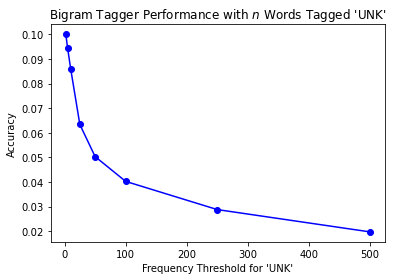

In [90]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs = []

for s in sizes:

    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)

    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.BigramTagger(train)
    perfs.append(t0.evaluate(test))

import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.show()

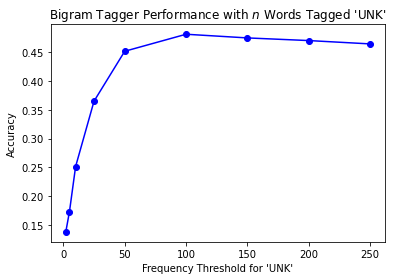

In [91]:
sizes = [2, 5, 10, 25, 50, 100, 150, 200, 250]
perfs = []

for s in sizes:

    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)

    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.BigramTagger(train)
    perfs.append(t0.evaluate(test))

import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.show()

In [92]:
less_than_100 = 0

for _, v in new_freq.items():
    if v <= 100:
        less_than_100 += 1

less_than_100

13029

In [93]:
less_than_100/len(new_freq)

0.9936699206833435

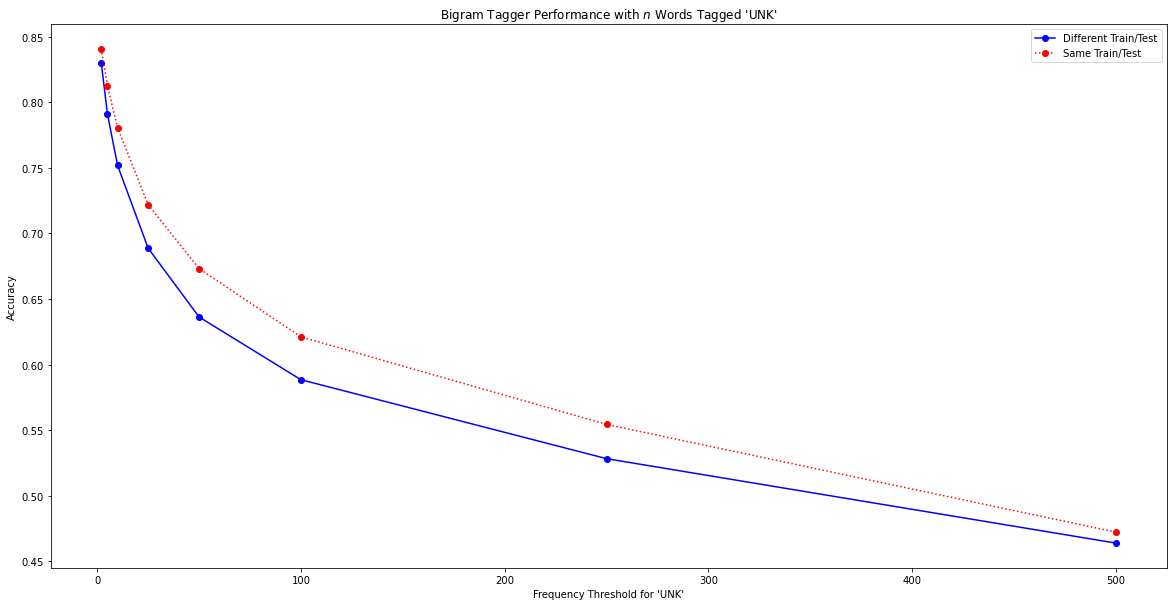

In [94]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs = []

for s in sizes:

    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)

    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)

    perfs.append(t2.evaluate(test))

sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs2 = []

for s in sizes:

    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)

    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)
    perfs2.append(t2.evaluate(test))

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sizes, perfs, '-bo', label = "Different Train/Test")
plt.plot(sizes, perfs2, ':ro', label = "Same Train/Test")
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

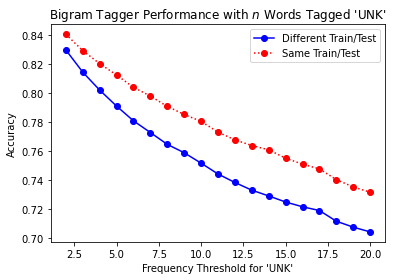

In [95]:
import numpy as np

sizes = np.arange(2, 21)
perfs = []

for s in sizes:

    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)

    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)

    perfs.append(t2.evaluate(test))

sizes = np.arange(2, 21)
perfs2 = []

for s in sizes:

    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)

    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)
    perfs2.append(t2.evaluate(test))

import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo', label = "Different Train/Test")
plt.plot(sizes, perfs2, ':ro', label = "Same Train/Test")
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

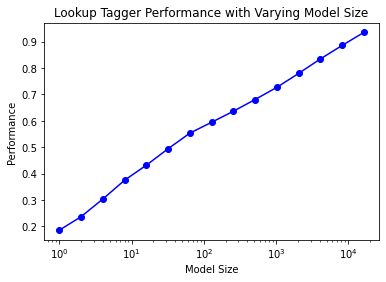

In [96]:
# Exercise: 5-31
# Modify the program in Example 5-4 to use a logarithmic scale on the x-axis, by replacing pylab.plot() with
# pylab.semilogx(). What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt,
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

import matplotlib.pyplot as plt
import numpy as np

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    # replacing plt.plot with plt.semilogx
    plt.semilogx(sizes, perfs, '-bo')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.show()

display()

In [97]:
# Exercise: 5-32
# Consult the documentation for the Brill tagger demo function, using help(nltk.tag.brill.demo). Experiment
# with the tagger by setting different values for the parameters. Is there any trade-off between training
# time (corpus size) and performance?

from nltk.tbl import demo as brill_tagger
brill_tagger.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

In [98]:
help(brill_tagger.demo())

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

In [99]:
# Exercise: 5-33
# Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can
# follow a given word having a given POS tag, i.e., wordi → tagi → tagi+1.

tag_plus = []

# simplified tagset
bts = brown.tagged_sents(tagset = 'universal')

# make a list of words with their tag and tag+1
for sent in bts:
    for i in range(len(sent) - 1):
        tag_plus.append((sent[i][0].lower(), sent[i][1], sent[i + 1][1]))


# get rid of duplicates
tag_plus = set(tag_plus)

In [100]:
from collections import defaultdict

POS = defaultdict(list)

for word, tag1, tag2 in tag_plus:
    POS[word].append({tag1: tag2})

POS['the']

[{'DET': 'PRT'},
 {'DET': 'VERB'},
 {'DET': 'ADV'},
 {'DET': '.'},
 {'X': '.'},
 {'DET': 'NUM'},
 {'DET': 'ADP'},
 {'DET': 'NOUN'},
 {'DET': 'ADJ'},
 {'DET': 'PRON'},
 {'DET': 'CONJ'},
 {'DET': 'X'},
 {'X': 'X'}]

In [101]:
from collections import defaultdict
tag_plus = []

bts = brown.tagged_sents()

# make a list of words with their tag and tag+1
for sent in bts:
    for i in range(len(sent) - 1):
        tag_plus.append((sent[i][0].lower(), sent[i][1], sent[i + 1][1]))


# get rid of duplicates
tag_plus = set(tag_plus)

POS = defaultdict(list)

for word, tag1, tag2 in tag_plus:
    POS[word].append({tag1: tag2})


POS['the']

[{'AT': 'RBT'},
 {'AT': 'FW-NN-TL-NC'},
 {'AT-TL': 'VBG'},
 {'AT-TL': 'VBN-TL'},
 {'AT': 'OD-TL'},
 {'AT': 'FW-NNS-TL'},
 {'AT': 'RP'},
 {'AT-HL': 'VBG-HL'},
 {'AT-HL': 'NN$-HL'},
 {'AT': 'NR'},
 {'AT': 'FW-NN$'},
 {'AT': '--'},
 {'AT-TL': 'CD'},
 {'AT': 'NNS'},
 {'AT': 'NN+BEZ'},
 {'AT-TL': 'NNS$-TL'},
 {'AT': 'VBN'},
 {'AT': 'RB-TL'},
 {'AT': 'NN$'},
 {'AT-NC': 'NNS-NC'},
 {'AT': 'JJS'},
 {'AT': 'AP-TL'},
 {'AT-NC': 'NPS-NC'},
 {'AT': 'FW-NN-TL'},
 {'AT': '('},
 {'AT-HL': 'JJ-TL'},
 {'AT-TL': 'NPS-TL'},
 {'AT-NC': 'JJT-NC'},
 {'AT-TL': 'JJ-TL'},
 {'AT': 'VBG'},
 {'AT-TL': 'NNS-TL'},
 {'AT': 'PN'},
 {'AT': 'VBN-TL'},
 {'NIL': '``'},
 {'AT': 'JJ-HL'},
 {'AT': 'NP$'},
 {'AT-TL': 'NPS'},
 {'AT': 'FW-NN'},
 {'AT': 'JJS-TL'},
 {'AT': 'NN-HL'},
 {'AT': 'CD'},
 {'AT-HL': 'NP$-HL'},
 {'AT': 'NNS$-TL'},
 {'AT-NC': 'JJR-NC'},
 {'AT-TL': 'NR-TL'},
 {'AT': 'RB'},
 {'AT': 'AP'},
 {'AT': '*'},
 {'AT': 'PPO'},
 {'AT-TL': 'CD-TL'},
 {'AT-HL': 'VBN-HL'},
 {'AT-HL': 'NR-HL'},
 {'AT-HL': 'CD-HL'},
 {'AT

In [102]:
# Exercise: 5-34
# There are 264 distinct words in the Brown Corpus having exactly three possible tags.
# a: Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10
# distinct tags in the other column.
# b: For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word,
# one for each possible tag.

from collections import defaultdict

# create a ConditionalFreqDist with all the words in the corpus,
# with counts of each of their tags
dt = nltk.ConditionalFreqDist(brown.tagged_words())

# create a dictionary where the keys will be the number of distinct tags
tags = defaultdict(list)
for w in set(brown.words()):
    tags[len(dt[w])].append(w)

len(tags[3])

1146

In [103]:
max(tags)

12

In [104]:
for i in range(1, 13):
    print(i, "\t", len(tags[i]))

1 	 47328
2 	 7186
3 	 1146
4 	 265
5 	 87
6 	 27
7 	 12
8 	 1
9 	 1
10 	 2
11 	 1
12 	 1


In [105]:
tags[12]

['that']

In [106]:
that_tags = [tag for tag in dt['that']]

for sent in brown.tagged_sents():
    for word in sent:
        if word[0] == 'that' and word[1] in that_tags:
            print("EXAMPLE OF {}:".format(word[1]))
            print(*sent, sep = '\n')
            that_tags.remove(word[1])
            print('-------------------------')

EXAMPLE OF CS:
('The', 'AT')
('Fulton', 'NP-TL')
('County', 'NN-TL')
('Grand', 'JJ-TL')
('Jury', 'NN-TL')
('said', 'VBD')
('Friday', 'NR')
('an', 'AT')
('investigation', 'NN')
('of', 'IN')
("Atlanta's", 'NP$')
('recent', 'JJ')
('primary', 'NN')
('election', 'NN')
('produced', 'VBD')
('``', '``')
('no', 'AT')
('evidence', 'NN')
("''", "''")
('that', 'CS')
('any', 'DTI')
('irregularities', 'NNS')
('took', 'VBD')
('place', 'NN')
('.', '.')
-------------------------
EXAMPLE OF WPS:
('Regarding', 'IN')
("Atlanta's", 'NP$')
('new', 'JJ')
('multi-million-dollar', 'JJ')
('airport', 'NN')
(',', ',')
('the', 'AT')
('jury', 'NN')
('recommended', 'VBD')
('``', '``')
('that', 'CS')
('when', 'WRB')
('the', 'AT')
('new', 'JJ')
('management', 'NN')
('takes', 'VBZ')
('charge', 'NN')
('Jan.', 'NP')
('1', 'CD')
('the', 'AT')
('airport', 'NN')
('be', 'BE')
('operated', 'VBN')
('in', 'IN')
('a', 'AT')
('manner', 'NN')
('that', 'WPS')
('will', 'MD')
('eliminate', 'VB')
('political', 'JJ')
('influences', 'NN

In [107]:
# Exercise: 5-35
# Write a program to classify contexts involving the word must according to the tag of the following word. Can
# this be used to discriminate between the epistemic and deontic uses of must?

must = {}

bts = brown.tagged_sents()

# tabulate the tags that come after 'must'
for sent in bts:
    for i in range(len(sent) - 1):
        if sent[i][0].lower() == 'must':
            must[sent[i + 1][1]] = must.get(sent[i + 1][1], 0) + 1

must

{'BE': 369,
 'VB': 354,
 'VB-HL': 2,
 'HV': 136,
 '*': 21,
 'VB-TL': 2,
 'IN': 6,
 "''": 3,
 'RB': 74,
 'NP-HL': 1,
 ',': 17,
 'DO': 7,
 'PPSS': 1,
 'AT': 2,
 '.': 1,
 'NNS': 1,
 'CC': 2,
 'BE-HL': 2,
 'VBZ': 1,
 'HV-TL': 1,
 'PPLS': 1,
 'NIL': 1,
 'RB-HL': 1,
 'ABX': 1,
 'PPO': 2,
 'NN': 1,
 'PPS': 2,
 'ABN': 1}

In [108]:
from collections import defaultdict
must_examples = defaultdict(list)

bts = brown.tagged_sents()
bs = brown.sents()

# if a sentence has must, add the sentence to the dictionary
for x in range(len(bts)):
    for i in range(len(bts[x]) - 1):
        if bts[x][i][0].lower() == 'must':
            must_examples[bts[x][i + 1][1]].append(' '.join(bs[x]))

must_examples

defaultdict(list,
            {'BE': ['The largest hurdle the Republicans would have to face is a state law which says that before making a first race , one of two alternative courses must be taken : 1',
              'On the negative side of the balance sheet must be set some disappointment that the United States leadership has not been as much in evidence as hoped for .',
              "The secretary's greatest achievement is perhaps the rekindling of NATO realization that East-West friction , wherever it take place around the globe , is in essence the general conflict between two entirely different societies , and must be treated as such without regard to geographical distance or lack of apparent connection .",
              "The small shops `` must be retained , for they provide essential service to the community '' , according to the resolution , which added that they `` also are the source of livelihood for thousands of our neighbors '' .",
              'The law which governs ho

In [109]:
# Exercise: 5-36
# Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them
# on part of the Brown Corpus.
# a: Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which
# combination works best?
# b: Try varying the size of the training corpus. How does it affect your results?

size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs

    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9160118186961715

In [110]:
t1 = nltk.UnigramTagger(train_sents)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t1)
t2 = nltk.BigramTagger(train_sents, backoff = t0)
t2.evaluate(test_sents)

0.8666624756396555

In [111]:
t2 = nltk.BigramTagger(train_sents)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t2)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t1.evaluate(test_sents)

0.8948680874248235

In [112]:
t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t2 = nltk.BigramTagger(train_sents, backoff = t0)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t1.evaluate(test_sents)

0.8948680874248235

In [113]:
t1 = nltk.UnigramTagger(train_sents)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t2)
t0.evaluate(test_sents)

0.2313446910165336

In [114]:
t2 = nltk.BigramTagger(train_sents)
t1 = nltk.UnigramTagger(train_sents, backoff = t2)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t1)
t0.evaluate(test_sents)

0.2313446910165336

In [115]:
import random

new_list = [sent for sent in brown.tagged_sents()]
shuffled = random.sample(new_list, len(new_list))
size = int(len(shuffled) * .9)


train_sents = shuffled[:size]
test_sents = shuffled[size:]

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs

    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9263106303579567

In [116]:
import numpy as np

new_list = [sent for sent in brown.tagged_sents()]
shuffled = random.sample(new_list, len(new_list))

sizes = np.arange(.1, 1, .1)
perfs = []

for s in sizes:

    size = int(len(shuffled) * s)


    train_sents = shuffled[:size]
    test_sents = shuffled[size:]

    patterns = [
        (r'.*ing$', 'VBG'),                      # gerunds
        (r'.*ed$', 'VBD'),                       # simple past
        (r'.*es$', 'VBZ'),                       # 3rd singular present
        (r'.*ould$', 'MD'),                      # modals
        (r'.\'s$', 'NN$'),                       # possessive nouns
        (r'.*s$', 'NNS'),                        # plural nouns
        (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
        (r'.*ly$|.*wise', 'ADV'),                # adverbs

        # adjectives
        (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

        (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles
        (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation
        (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
        (r'.*', 'NN')                            # nouns (default)
    ]

    t0 = regexp_tagger = nltk.RegexpTagger(patterns)
    t1 = nltk.UnigramTagger(train_sents, backoff = t0)
    t2 = nltk.BigramTagger(train_sents, backoff = t1)
    perfs.append(t2.evaluate(test_sents))

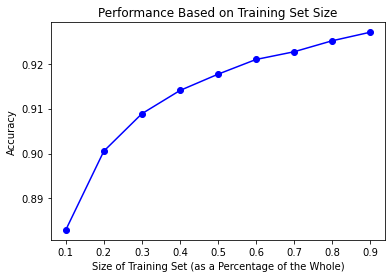

In [117]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Performance Based on Training Set Size")
plt.xlabel("Size of Training Set (as a Percentage of the Whole)")
plt.ylabel("Accuracy")
plt.show()

In [118]:
# Exercise: 5-37
# Our approach for tagging an unknown word has been to consider the letters of the word (using RegexpTagger()),
# or to ignore the word altogether and tag it as a noun (using nltk.DefaultTagger()). These methods will not do
# well for texts having new words that are not nouns. Consider the sentence I like to blog on Kim’s blog. If
# blog is a new word, then looking at the previous tag (TO versus NP$) would probably be helpful, i.e., we need a
# default tagger that is sensitive to the preceding tag.
# a: Create a new kind of unigram tagger that looks at the tag of the previous word, and ignores the current word.
# (The best way to do this is to modify the source code for UnigramTagger(), which presumes knowledge of
# object-oriented programming in Python.)
# b: Add this tagger to the sequence of backoff taggers (including ordinary trigram and bigram taggers that look at
# words), right before the usual default tagger.
# c: Evaluate the contribution of this new unigram tagger.

from nltk.tag.sequential import *
from nltk import jsontags



tagged_sents = brown.tagged_sents(categories="news")

size = int(len(tagged_sents) * 0.9)
train_sents = tagged_sents[:size]
test_sents = tagged_sents[size:]


@jsontags.register_tag
class PreviousTagger(UnigramTagger):
    json_tag = "nltk.tag.sequential.PreviousTagger"

    def __init__(self, train=None, model=None, backoff=None, cutoff=0, verbose=False):
        NgramTagger.__init__(self, 0, train, model, backoff, cutoff, verbose)

    def encode_json_obj(self):
        return self._context_to_tag, self.backoff


    @classmethod
    def decode_json_obj(cls, obj):
        _context_to_tag, backoff = obj
        return cls(model = _context_to_tag, backoff = backoff)

    def context(self, tokens, index, history):
        if index != 0:
            return history[index-1]
        else:
            return None


t0 = nltk.DefaultTagger('NN')
t1 = PreviousTagger(train_sents, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)
t4 = nltk.TrigramTagger(train_sents, backoff = t3)

t4.tag(["I", "like", "to", "blog", "on", "Kim's", "blog"])

[('I', 'PPSS'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('blog', 'VB'),
 ('on', 'IN'),
 ("Kim's", 'AT'),
 ('blog', 'NN')]

In [119]:
new_list = [sent for sent in brown.tagged_sents()]
shuffled = random.sample(new_list, len(new_list))

size = int(len(shuffled) * .9)


train_sents = shuffled[:size]
test_sents = shuffled[size:]

t0 = nltk.DefaultTagger('NN')
t1 = PreviousTagger(train_sents, backoff=t0)
t2 = nltk.UnigramTagger(train_sents, backoff=t1)
t3 = nltk.BigramTagger(train_sents, backoff=t2)
t4 = nltk.TrigramTagger(train_sents, backoff=t3)
t4.evaluate(test_sents)

0.9232494200532692

In [120]:
patterns = [
        (r'.*ing$', 'VBG'),                      # gerunds
        (r'.*ed$', 'VBD'),                       # simple past
        (r'.*es$', 'VBZ'),                       # 3rd singular present
        (r'.*ould$', 'MD'),                      # modals
        (r'.\'s$', 'NN$'),                       # possessive nouns
        (r'.*s$', 'NNS'),                        # plural nouns
        (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
        (r'.*ly$|.*wise', 'ADV'),                # adverbs

        # adjectives
        (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

        (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles
        (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation
        (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
        (r'.*', 'NN')                            # nouns (default)
    ]

t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t1 = PreviousTagger(train_sents, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)
t4 = nltk.TrigramTagger(train_sents, backoff = t3)
t4.evaluate(test_sents)

0.9235930921900507

In [121]:
t0 = PreviousTagger(train_sents)
t1 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)
t4 = nltk.TrigramTagger(train_sents, backoff = t3)
t4.evaluate(test_sents)

0.9288856430964859

In [122]:
# Exercise: 5-39
# Use some of the estimation techniques in nltk.probability, such as Lidstone or Laplace estimation, to develop a
# statistical tagger that does a better job than n-gram backoff taggers in cases where contexts encountered during
# testing were not seen during training.

train_corpus = shuffled[:4500]
test_corpus = shuffled[4500:5000]

In [123]:
from nltk.probability import *

trainer = nltk.hmm.HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_corpus, estimator = LaplaceProbDist)

In [124]:
tagger.evaluate(test_corpus)

0.7836393665597979

In [125]:
def lidstone(gamma):
    return lambda fd, bins: LidstoneProbDist(fd, gamma, bins)

tagger = trainer.train_supervised(train_corpus, estimator = lidstone(0.1))

In [126]:
tagger.evaluate(test_corpus)

0.8684542893228407

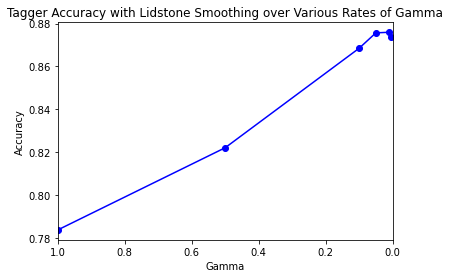

In [127]:
gamma = [1.0, 0.5, 0.1, 0.05, 0.01, 0.005]

perfs = []

for g in gamma:
    tagger = trainer.train_supervised(train_corpus, estimator = lidstone(g))
    perfs.append(tagger.evaluate(test_corpus))



plt.plot(gamma, perfs, '-bo')
plt.title("Tagger Accuracy with Lidstone Smoothing over Various Rates of Gamma")
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xlim(1.0, 0)
plt.show()

In [128]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.8681628291071602

In [129]:
# Exercise: 5-42
# Investigate three different ways to define the split between training and testing data when developing a tagger
# using the Brown Corpus: genre (category), source (fileid), and sentence. Compare their relative performance and
# discuss which method is the most legitimate. (You might use n-fold cross validation, discussed in Evaluation,
# to improve the accuracy of the evaluations.)

bts = brown.tagged_sents()
size = int(len(bts) * 0.9)

train_corpus = bts[:size]
test_corpus = bts[size:]

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.9125751765470128

In [130]:
train_corpus = []
test_corpus = []

for c in brown.categories():

    bts = brown.tagged_sents(categories = c)
    size = int(len(bts) * 0.9)

    temp_train = bts[:size]
    temp_test = bts[size:]

    train_corpus += temp_train
    test_corpus += temp_test

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.909745418623536

In [131]:
train_corpus = []
test_corpus = []

for i in brown.fileids():
    if i[-1] == "1":
        test_corpus += [sent for sent in brown.tagged_sents(fileids = i)]
    else:
        train_corpus += [sent for sent in brown.tagged_sents(fileids = i)]

    t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.9093961883084617

In [132]:
import random

bts = list(brown.tagged_sents())
random.shuffle(bts)
size = int(len(bts) * 0.9)

train_corpus = bts[:size]
test_corpus = bts[size:]

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.9240425423122156

In [133]:
slices = [x for x in np.arange(.1, 1.0, 0.1)]

evals = []
for i in range(len(slices)):
    if i == 0:
        bts = brown.tagged_sents()
        size = int(len(bts) * slices[i])
        train_corpus, test_corpus = bts[size:], bts[:size]
    elif i == 8:
        bts = brown.tagged_sents()
        size = int(len(bts) * slices[i])
        train_corpus, test_corpus = bts[:size], bts[size:]
    else:
        bts = brown.tagged_sents()
        size1 = int(len(bts) * slices[i])
        size2 = int(len(bts) * slices[i + 1])
        train_corpus = bts[:size1] + bts[size2:]
        test_corpus = bts[size1:size2]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
    t2 = nltk.BigramTagger(train_corpus, backoff = t1)
    evals.append(t2.evaluate(test_corpus))

np.average(evals)

0.9069345663394456

In [134]:
# Exercise: 5-43
# Develop your own NgramTagger class that inherits from NLTK’s class, and which encapsulates the method of
# collapsing the vocabulary of the tagged training and testing data that was described in this chapter. Make
# sure that the unigram and default backoff taggers have access to the full vocabulary.

fd = nltk.FreqDist(brown.words())
word_list = fd.keys()

word_mapping = dict((w, w) if fd[w] > 3 else (w, 'UNK')
                    for w in word_list)
brown_tagged_sent = brown.tagged_sents(categories = 'news')
new_brown_tagged_sent = [[(word_mapping[wd], tag) for
                          (wd, tag) in sent]
                          for sent in brown_tagged_sent]
training_size = int(len(brown_tagged_sents) * 0.9)
unk_train_sents = new_brown_tagged_sent[:training_size]
unk_test_sents = new_brown_tagged_sent[training_size:]
t0 = nltk.UnigramTagger(unk_train_sents)
t1 = nltk.BigramTagger(unk_train_sents, backoff = t0)
t2.evaluate(unk_test_sents)

0.9206618160071763

In [135]:
t0 = nltk.UnigramTagger(unk_train_sents)
t1 = nltk.BigramTagger(unk_train_sents, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)

train_wds = set([wd for sent in train_sents for (wd, tag) in sent])

prep_test_sent = [[(wd, tag) if wd in train_wds else ('UNK', tag)
                   for (wd, tag) in sent] for sent in brown_tagged_sent]
t3.evaluate(prep_test_sent)

0.9553871551604113